In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
 %cd /content/drive/My Drive/Colab Notebooks

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks'
/content


In [0]:
ls

3scenes/               classify.ipynb  forest/   nn_iris.ipynb
classify_gambar.ipynb  coast/          highway/


In [0]:
#import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from imutils import paths
from PIL import Image
import os
import matplotlib.pyplot as plt

In [0]:
def extract_color_stats(image):
  (R,G,B)= image.split()
  features=[np.mean(R),np.mean(G),np.mean(B),np.std(R),np.std(G),np.std(R)]
  return features

In [0]:
models= {
    "knn" : KNeighborsClassifier(n_neighbors= 1),
    "naive_bayes" : GaussianNB(),
    "logit" : LogisticRegression(solver="lbfgs",multi_class="auto"),
    "SVM" : SVC(kernel="rbf",gamma="auto"),
    "decision_tree" : DecisionTreeClassifier(),
    "random_forest" : RandomForestClassifier(n_estimators=100),
    "mlp" : MLPClassifier()
}
print("[Info]Loading data....")



[Info]Loading data....


In [0]:
print("[INFO] extracting image features...")
imagePaths = paths.list_images("3scenes")
data = []
labels = []

[INFO] extracting image features...


In [0]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, compute color channel
	# statistics, and then update our data list
	image = Image.open(imagePath)
	features = extract_color_stats(image)
	data.append(features)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [0]:
np_list = np.array(labels)
print(np_list.shape)

(948,)


In [0]:
# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)

In [0]:
(x_train, x_test, y_train, y_test)=train_test_split(data,labels,test_size=0.25)

In [0]:
# train the model
print("[INFO] using '{}' model".format("knn"))
model = models["knn"]
model.fit(x_train,y_train)

[INFO] using 'knn' model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(x_test)
print(classification_report(y_test, predictions,
	target_names=le.classes_))
accknn=accuracy_score(y_test, predictions)

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.71      0.65      0.68        89
      forest       0.83      0.74      0.78        80
     highway       0.62      0.76      0.68        68

    accuracy                           0.71       237
   macro avg       0.72      0.72      0.71       237
weighted avg       0.72      0.71      0.71       237



In [0]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [0]:
print(x_test[2])
print(y_test.shape)
print(y_test[2])

[128.87919617 156.9356842  185.29722595  61.83227378  55.07026123
  61.83227378]
(237,)
0


In [0]:
print(le.classes_[y_test[2]])

coast


In [0]:
image=x_test[2].reshape(1,-1)
predictions = model.predict(image)
print(le.classes_[predictions])

['coast']


In [0]:
#naive bayes
# train the model
print("[INFO] using '{}' model".format("naive_bayes"))
model2 = models["naive_bayes"]
model2.fit(x_train,y_train)

[INFO] using 'naive_bayes' model


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions2 = model2.predict(x_test)
print(classification_report(y_test, predictions2,
	target_names=le.classes_))
accnb=accuracy_score(y_test, predictions2)

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.80      0.39      0.53        89
      forest       0.65      0.75      0.70        80
     highway       0.54      0.81      0.65        68

    accuracy                           0.63       237
   macro avg       0.66      0.65      0.62       237
weighted avg       0.68      0.63      0.62       237



In [0]:
#decision tree
# train the model
print("[INFO] using '{}' model".format("decision_tree"))
model3 = models["decision_tree"]
model3.fit(x_train,y_train)

[INFO] using 'decision_tree' model


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions3 = model3.predict(x_test)
print(classification_report(y_test, predictions3,
	target_names=le.classes_))
accdt=accuracy_score(y_test, predictions3)

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.62      0.58      0.60        89
      forest       0.71      0.74      0.72        80
     highway       0.64      0.66      0.65        68

    accuracy                           0.66       237
   macro avg       0.66      0.66      0.66       237
weighted avg       0.66      0.66      0.66       237



In [0]:
#SVM
# train the model
print("[INFO] using '{}' model".format("SVM"))
model4 = models["SVM"]
model4.fit(x_train,y_train)

[INFO] using 'SVM' model


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions4 = model4.predict(x_test)
print(classification_report(y_test, predictions4,
	target_names=le.classes_))
accsvm=accuracy_score(y_test, predictions4)

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.39      1.00      0.56        89
      forest       1.00      0.01      0.02        80
     highway       1.00      0.07      0.14        68

    accuracy                           0.40       237
   macro avg       0.80      0.36      0.24       237
weighted avg       0.77      0.40      0.26       237



In [0]:
#random forest
# train the model
print("[INFO] using '{}' model".format("random_forest"))
model5 = models["random_forest"]
model5.fit(x_train,y_train)

[INFO] using 'random_forest' model


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions5 = model5.predict(x_test)
print(classification_report(y_test, predictions5,
	target_names=le.classes_))
accrf=accuracy_score(y_test, predictions5)

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.77      0.80      0.78        89
      forest       0.87      0.85      0.86        80
     highway       0.78      0.76      0.77        68

    accuracy                           0.81       237
   macro avg       0.81      0.80      0.81       237
weighted avg       0.81      0.81      0.81       237



In [0]:
#Logistic regression
# train the model
print("[INFO] using '{}' model".format("logit"))
model6 = models["logit"]
model6.fit(x_train,y_train)

[INFO] using 'logit' model


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions6 = model6.predict(x_test)
print(classification_report(y_test, predictions6,
	target_names=le.classes_))
acclogic=accuracy_score(y_test, predictions6)


[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.70      0.74      0.72        89
      forest       0.83      0.84      0.83        80
     highway       0.71      0.65      0.68        68

    accuracy                           0.75       237
   macro avg       0.75      0.74      0.74       237
weighted avg       0.75      0.75      0.75       237



In [0]:
#MLP
# train the model
print("[INFO] using '{}' model".format("mlp"))
model7 = models["mlp"]
model7.fit(x_train,y_train)

[INFO] using 'mlp' model


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions7 = model7.predict(x_test)
print(classification_report(y_test, predictions7,
	target_names=le.classes_))
accmlp=accuracy_score(y_test, predictions7)

[INFO] evaluating...
              precision    recall  f1-score   support

       coast       0.63      0.90      0.74        89
      forest       0.88      0.80      0.84        80
     highway       0.76      0.41      0.53        68

    accuracy                           0.73       237
   macro avg       0.75      0.70      0.70       237
weighted avg       0.75      0.73      0.71       237



(0.7130801687763713, 0.6329113924050633, 0.6582278481012658, 0.4008438818565401, 0.8059071729957806, 0.7468354430379747, 0.7257383966244726)


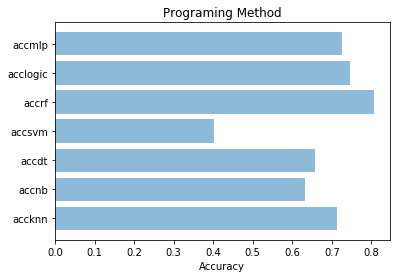

In [0]:
#accknn
#accnb
#accdt
#accsvm
#accrf
#acclogic
#accmlp
#ploting
a=(accknn,accnb,accdt,accsvm,accrf,acclogic,accmlp)
print(a)
objects = ('accknn','accnb','accdt','accsvm','accrf','acclogic','accmlp')
arrays=np.arange(len(objects))
accuracys = [accknn,accnb,accdt,accsvm,accrf,acclogic,accmlp]

plt.barh(arrays, accuracys, align='center', alpha=0.5)
plt.yticks(arrays, objects)
plt.xlabel('Accuracy')
plt.title('Programing Method')

plt.show()
